In [1]:
import mne
import pickle
import pyriemann
import numpy as np
from pyriemann.tangentspace import TangentSpace
from pyriemann.estimation import Shrinkage, Covariances
from pyriemann.preprocessing import Whitening
import s00_helper_functions_data_bva_edf3 as helper
import os
import pandas as pd
import envelope_and_TF_pipeline as etf

In [2]:
eeg_foldername = '/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF'
fmri_foldername = '/data2/Projects/eeg_fmri_natview/data/fmriprep/derivatives/cap_ts'
eeg_filename = 'sub-02_ses-01_task-checker_run-01_eeg.edf'
raw = mne.io.read_raw(os.path.join(eeg_foldername, eeg_filename), preload=True)
raw = etf.extract_eeg_only(raw)
raw = etf.specific_crop(raw, 1, False)
blinks_remover = etf.BlinkRemover(raw).remove_blinks()
blinks_removed_raw = blinks_remover.blink_removed_raw
muscle_annotations, _ = mne.preprocessing.annotate_muscle_zscore(blinks_removed_raw, 
                                            threshold       = 3.5, 
                                            ch_type         = None, 
                                            min_length_good = 0.1, 
                                            filter_freq     = (30, None), 
                                            )
blinks_removed_raw.set_annotations(blinks_removed_raw.annotations + muscle_annotations)
events = mne.events_from_annotations(blinks_removed_raw)
trigger_name = 'R128'
filtered_events_mask = np.where(events[0][:, 2] == events[1][trigger_name])
filtered_events = events[0][filtered_events_mask]

brainstate_exists, brainstate = helper.get_brainstate_data(
    brainstate_dir = fmri_foldername,
    sub='01', 
    ses='01', 
    task='checker')

epochs = mne.Epochs(blinks_removed_raw, 
                    filtered_events, 
                    tmin=-4, 
                    tmax=-1/raw.info['sfreq'], 
                    baseline=None, 
                    preload=True,
                    metadata=brainstate,
                    reject_by_annotation=True
                    )
epochs.drop(epochs.metadata[epochs.metadata['Mask'] == 0].index)


Extracting EDF parameters from /projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF/sub-02_ses-01_task-checker_run-01_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Reading 0 ... 66499  =      0.000 ...   265.996 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S  1', 'S 10', 'S 11', 'S 12', 'S 25', 'S 26', 'S 27', 'S 99', 'Sync On', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'Userdefined Artifact']
Used Annotations descriptions: ['New Segment', 'R', 'R128', 'S  1', 'S 10', 'S 11', 'S 12', 'S 25', 'S 26', 'S 27', 'S 99', 'Sync On', 'TEND', 'TPEAK', 'TSTART', 'Time 0', 'Userdefined Artifact']
cropping from 36.568 to 244.368
Running EOG SSP computation
Using EOG channels: Fp1, Fp2
EOG channel index for this subject is: [0 1]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel Fp1 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) meth

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 413 samples (1.652 s)

Used Annotations descriptions: ['R', 'R128', 'S  1', 'S 10', 'S 11', 'S 12', 'S 25', 'S 26', 'S 27', 'S 99', 'Sync On', 'TEND', 'TPEAK', 'TSTART']
/data2/Projects/eeg_fmri_natview/data/fmriprep/derivatives/cap_ts/sub-01_ses-01_task-checker.txt
Adding metadata with 9 columns
98 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 98 events and 1000 original time points ...
5 bad epochs dropped
Dropped 0 epochs: 


<Epochs | 93 events (all good), -4 – -0.004 s (baseline off), ~43.4 MB, data loaded, with metadata,
 '2': 93>

In [2]:
eeg_foldername = '/projects/EEG_FMRI/bids_eeg/BIDS/NEW/PREP_BV_EDF'
fmri_foldername = '/data2/Projects/eeg_fmri_natview/data/fmriprep/derivatives/cap_ts'
eeg_filename = 'sub-14_ses-01_task-checker_run-01_eeg.edf'

def prepare_raw(eeg_foldername, eeg_filename):
    raw = mne.io.read_raw(os.path.join(eeg_foldername, eeg_filename), preload=True)
    raw = etf.extract_eeg_only(raw)
    raw = etf.specific_crop(raw, 1, False)
    blinks_remover = etf.BlinkRemover(raw).remove_blinks()
    blinks_removed_raw = blinks_remover.blink_removed_raw
    muscle_annotations, _ = mne.preprocessing.annotate_muscle_zscore(blinks_removed_raw, 
                                             threshold=3.5, 
                                             ch_type=None, 
                                             min_length_good=0.1, 
                                             filter_freq=(30, None), 
                                             )
    blinks_removed_raw.set_annotations(blinks_removed_raw.annotations + muscle_annotations)
    return blinks_removed_raw
def create_epochs(raw: mne.io.Raw,
                  brainstate: pd.DataFrame):
    events = mne.events_from_annotations(raw)
    trigger_name = 'R128'
    filtered_events_mask = np.where(events[0][:, 2] == events[1][trigger_name])
    filtered_events = events[0][filtered_events_mask]


    epochs = mne.Epochs(raw,
                        filtered_events, 
                        tmin=-4, 
                        tmax=-1/raw.info['sfreq'], 
                        baseline=None, 
                        preload=True,
                        metadata=brainstate,
                        reject_by_annotation=True
                        )
    epochs.drop(np.logical_not(epochs.metadata['Mask'].astype(bool)))
    return epochs

def calculate_tangent_space(epochs: mne.Epochs):
    covariance = Covariances(estimator='lwf').transform(epochs.get_data())
    whitener = Whitening(metric = 'riemann')
    whitened_cov_matrices = whitener.fit_transform(covariance)
    tangent_space = TangentSpace()
    X_tangent = tangent_space.fit_transform(whitened_cov_matrices)
    return X_tangent


In [3]:
%%capture
subjects = [ '01', '02', '03', '05', '06', '07', '08', '09', '10',
    '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']
sessions = [ '01', '02' ] # 
tasks = [ 'checker', 'rest' ]
runs = [ '01', '02' ]
concatenated_data = {}
for subject in subjects:
    for session in sessions:
        for task in tasks:
            for run in runs:
                eeg_filename = f'sub-{subject}_ses-{session}_task-{task}_run-{run}_eeg.edf'
                brainstate_exists, brainstate = helper.get_brainstate_data(
                    brainstate_dir=fmri_foldername,
                    sub=subject,
                    ses=session,
                    task=task,
                )
                both_file_exist = (
                    os.path.exists(os.path.join(eeg_foldername, eeg_filename)) and
                    brainstate_exists
                )
                if both_file_exist:
                    try:
                        raw = prepare_raw(eeg_foldername, eeg_filename)
                        raw.filter(0.1, 40)
                        epochs = create_epochs(raw, brainstate)
                        tangent_array = calculate_tangent_space(epochs)
                        caps = {}
                        for cap_name in brainstate.columns:
                            if cap_name != 'Mask':
                                caps.update({cap_name: epochs.metadata[cap_name].values})
                        concatenated_data.update(
                            {f'sub-{subject}_ses-{session}_task-{task}_run-{run}': {'X': tangent_array, 'Y': caps}
                                    }
                                                )
                    except Exception as e:
                        print(f'Error in {eeg_filename}: {e}')
                        continue

In [4]:
import pickle
with open('tangent_space_data.pkl', 'wb') as f:
    pickle.dump(concatenated_data, f)

In [12]:
concatenated_data

{'sub-01_ses-01_task-checker_run-01': {'X': array([[ 0.28028944,  0.48658775,  0.20501813, ...,  0.33168602,
           0.02073354,  0.36349279],
         [ 0.12508083,  0.34849428,  0.21465141, ...,  0.30605396,
           0.0387871 ,  0.22099769],
         [ 0.1436615 ,  0.21891172, -0.05938623, ...,  0.07312293,
           0.08790445,  0.60235921],
         ...,
         [ 0.14888362,  0.14487367,  0.01040696, ...,  0.26122529,
          -0.0540205 ,  0.07886934],
         [ 0.32800827, -0.03912195, -0.22735189, ...,  0.20379479,
          -0.08281528,  0.21255274],
         [ 0.30157772, -0.12379771, -0.2464769 , ...,  0.16245569,
           0.10578993, -0.03862156]]),
  'Y': {'CAP1': array([ 0.14915197,  0.27593621,  0.28534789,  0.14248913, -0.05807165,
          -0.15029446, -0.12175829,  0.04829685,  0.18616599,  0.18754464,
           0.13205279, -0.01225724, -0.17374914, -0.23729988, -0.21881648,
          -0.18419218, -0.19713605, -0.27619809, -0.33293566, -0.21920753,
     

Test subject: sub-01, R^2 accuracy: -0.6428
Test subject: sub-02, R^2 accuracy: -0.5393
Test subject: sub-03, R^2 accuracy: -0.2226
Test subject: sub-05, R^2 accuracy: -1.2725
Test subject: sub-06, R^2 accuracy: -0.4115
Test subject: sub-07, R^2 accuracy: -0.7109
Test subject: sub-08, R^2 accuracy: -0.7881
Test subject: sub-09, R^2 accuracy: -0.2354
Test subject: sub-11, R^2 accuracy: -0.5513
Test subject: sub-12, R^2 accuracy: -0.1787
Test subject: sub-13, R^2 accuracy: -0.1620
Test subject: sub-14, R^2 accuracy: -0.5996
Error in sub-15: need at least one array to concatenate
Test subject: sub-16, R^2 accuracy: -0.1572
Test subject: sub-18, R^2 accuracy: -0.4984
Test subject: sub-20, R^2 accuracy: -0.4707
Test subject: sub-21, R^2 accuracy: 0.1429
Test subject: sub-22, R^2 accuracy: -0.5004
Test subject: sub-01, R^2 accuracy: -0.8353
Test subject: sub-02, R^2 accuracy: -0.6787
Test subject: sub-03, R^2 accuracy: -0.2362
Test subject: sub-05, R^2 accuracy: -0.7961
Test subject: sub-06,

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (8, 17).

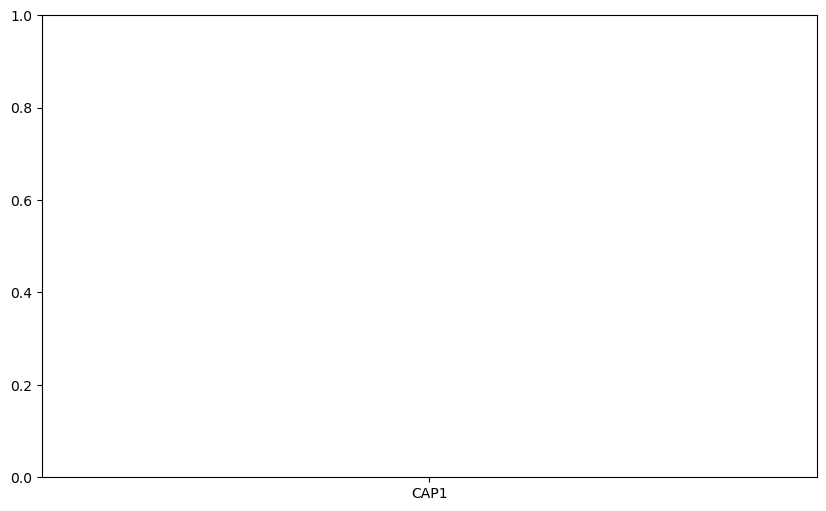

In [8]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import scipy

# Initialize variables to store results
subjects = []
all_keys = list(concatenated_data.keys())
all_subjects = sorted(set([key.split('_')[0] for key in all_keys]))  # 'sub-01', 'sub-02', etc.
caps = ['CAP1', 'CAP2', 'CAP3', 'CAP4', 'CAP5', 'CAP6', 'CAP7', 'CAP8']
# Loop through each subject for leave-one-out cross-validation
accuracies_across_cap = []
for cap in caps:
    accuracies = []
    for test_subject in all_subjects:
        try:
            X_train_list = []
            Y_train_list = []
            
            X_test = []
            Y_test = []
            
            for key in all_keys:
                try:
                    subject = key.split('_')[0]  # Extract subject from the key
                    task = key.split('_')[2]  # Extract task from the key
                    session = key.split('_')[1]  # Extract session from the key
                    
                    if task == "task-checker":
                        if subject == test_subject:
                            # Assign this subject's data to the test set
                            X_test.append(concatenated_data[key]['X'])
                            Y_test.append(concatenated_data[key]['Y'][cap])
                        else:
                            # Append this subject's data to the training set
                            X_train_list.append(concatenated_data[key]['X'])
                            Y_train_list.append(concatenated_data[key]['Y'][cap])
                except Exception as e:
                    print(f'Error in {key}: {e}')
                    continue
                
            # Concatenate training data
            X_train = np.concatenate(X_train_list, axis=0)
            Y_train = np.concatenate(Y_train_list, axis=0)
            
            # Concatenate test data (if multiple runs/sessions per subject)
            X_test = np.concatenate(X_test, axis=0)
            Y_test = np.concatenate(Y_test, axis=0)
            
            # Train the Ridge Regression model
            model = RidgeCV()
            model.fit(X_train, Y_train)
            
            # Predict on the test set
            Y_pred = model.predict(X_test)
            
            # Calculate R^2 accuracy
            accuracy = r2_score(Y_test, Y_pred)
            correlation = scipy.stats.pearsonr(Y_test, Y_pred)
            
            # Store the results
            subjects.append(test_subject)
            accuracies.append(correlation.statistic)
            
            print(f"Test subject: {test_subject}, R^2 accuracy: {accuracy:.4f}")
        except Exception as e:
            print(f'Error in {test_subject}: {e}')
            continue
    accuracies_across_cap.append(accuracies)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(caps, accuracies_across_cap, color='blue')
plt.xlabel('Subject')
plt.ylabel('R^2 Accuracy')
plt.title('Leave-One-Out Ridge Regression Accuracy for Each Subject')
plt.xticks(rotation=90)
plt.show()

In [39]:
21*8


168

/tmp/ipykernel_3923197/175861911.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data = df_pearson_r,
/tmp/ipykernel_3923197/175861911.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_pearson_r,


([<matplotlib.axis.XTick at 0x7ff4ad439010>,
 [Text(0, 0, 'CAP1'),
  Text(1, 0, 'CAP2'),
  Text(2, 0, 'CAP3'),
  Text(3, 0, 'CAP4'),
  Text(4, 0, 'CAP5'),
  Text(5, 0, 'CAP6'),
  Text(6, 0, 'CAP7'),
  Text(7, 0, 'CAP8')])

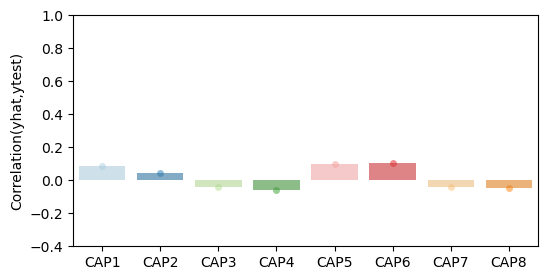

In [6]:
import seaborn as sns
data = np.array(accuracies_across_cap)
caps = [f'CAP{i+1}' for i in range(data.shape[0])]

# Create the DataFrame
df = pd.DataFrame(data.T, columns=caps)

# Reshape the DataFrame to have CAP and Pearson correlation in two columns
df_pearson_r = df.melt(var_name='ts_CAPS', value_name='pearson_r')

fig, ax = plt.subplots(figsize=(6,3))
sns.stripplot(data = df_pearson_r,
            x = 'ts_CAPS',
            y = 'pearson_r',
            ax = ax,
            palette = 'Paired',
            alpha=0.5, 
            size=5, 
            zorder=0
            )

sns.barplot(data = df_pearson_r, 
            x = 'ts_CAPS', 
            y = 'pearson_r', 
            errorbar = ('ci',68),
            ax = ax, 
            palette = 'Paired',
            alpha=0.6, 
            width=0.8, 
            zorder=1
            )

caps_names = ['CAP1','CAP2','CAP3','CAP4','CAP5','CAP6','CAP7','CAP8']
plt.ylim(-0.4,1)
plt.xlabel('')
plt.ylabel('Correlation(yhat,ytest)')#, size = 12)
plt.xticks(ticks = np.arange(8), labels = caps_names)#, size = 12)

In [7]:
accuracies_across_cap

[[0.08690849819593201],
 [0.04594498885865768],
 [-0.03963350408197879],
 [-0.05649061180902642],
 [0.0960387157080864],
 [0.10331076562855514],
 [-0.04312033918290322],
 [-0.04565243525939803]]